# Getting Started with Foundation Models
copyright 2023 Denis Rothman, MIT License

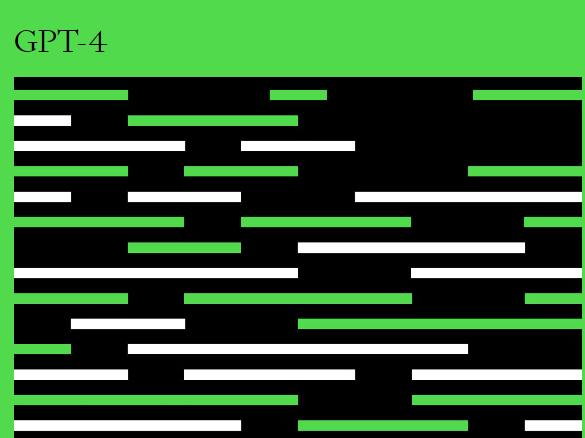

This notebook explores GPT-3, GPT-3.5 turbo(ChatGPT) and GPT-4 models. Each model is implemented for each task. Which one should you choose for your project? 

Let's ask GPT-4 to guide us through this challenging question.

**Denis Rothman:**What do you really need for NLP tasks: GPT-3, GPT-3.5-turbo, or GPT-4? 

**GPT-4** The choice between GPT-3, GPT-3.5-turbo, and GPT-4 for NLP tasks depends on your specific requirements, such as the level of complexity, budget, and the desired balance between response time and accuracy. Here's a general guideline for choosing between these models:

GPT-3: This model provides a good balance of capability, cost, and response time. If your NLP tasks are moderately complex and you are looking for an affordable option that delivers reliable performance, GPT-3 engines like Curie or Babbage can be suitable.

GPT-3.5-turbo: Designed to offer similar capabilities as GPT-3's Davinci engine but at a lower cost per token, GPT-3.5-turbo can be a suitable choice if you want a powerful engine with a more cost-effective approach. Use it for tasks that require more creativity and nuanced understanding without breaking the bank.

GPT-4: As the most advanced model in this series, GPT-4 can be the best choice for highly complex NLP tasks that demand superior performance, understanding, and creativity. If you are working on cutting-edge applications or need a top-tier language model for research, GPT-4 may be the right choice. However, keep in mind that GPT-4 could be more expensive and have slower response times compared to the other options.

Ultimately, the choice depends on your project's specific requirements, budget, and the desired trade-offs between performance and cost. It can be helpful to experiment with different models and engines to find the one that best fits your needs.












What do you really need for NLP tasks: GPT-3, GPT-3.5-turbo, or GPT-4? Run each task in the notebook to decide.


##  Installing & importing Openai

In [109]:
try:
  import openai
except:
  !pip install openai
  import openai

##  Entering the API KEY

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
f = open("drive/MyDrive/files/api_key.txt", "r")
API_KEY=f.readline()
f.close()

In [112]:
#The OpenAI Key
import os
os.environ['OPENAI_API_KEY'] =API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")

#Engines

### List of Engines

[OpenAI models](https://platform.openai.com/docs/models/overview) include engines. 

What is the difference between OpenAI models and engines?

**Denis Rothman:** OpenAI has several models such as GPT-3, GPT-3.5-turbo, and GPT-4. OpenAI also has several engines. What is the difference between the models and the engines?

**GPT-4:** OpenAI's models refer to different versions or iterations of their language models, each with distinct capabilities, complexity, and performance. GPT-3, GPT-3.5-turbo, and GPT-4 are examples of different models, with GPT-4 being the most advanced version in the series you mentioned.

On the other hand, engines are specific configurations or instances of a given model, tailored to provide different levels of performance, cost, and use cases. Each engine has a different balance of capabilities, such as response time, token limits, and creative output.

To clarify, let's consider GPT-3 as an example. GPT-3 has several engines associated with it, including:

Davinci: The most capable and creative engine, suitable for complex tasks but with a higher cost per token and slower response time.
Curie: A more balanced engine, offering a mix of capability and cost efficiency.
Babbage: A faster and more cost-effective engine, ideal for less complex tasks that require less creative responses.
Ada: The fastest and most affordable engine, suitable for straightforward tasks that don't demand high creativity.
In summary, models represent different versions of OpenAI's language models, while engines are various configurations of those models, each designed to address specific needs and use cases.






In [113]:
elist=openai.Engine.list()

In [114]:
length=len(elist["data"])
print("Number of Engines: ",length)

Number of Engines:  56


In [115]:
ef=open('engines.txt','w')
ef.write("engine")
ef.write('\n')
l=0
for i in range(0,length):
  try:
    el=elist["data"][i]["id"]
    print(i,el)
    ef.write(str(el))
    ef.write('\n')
  except:
    print("number of engines: ",i)

ef.close()

0 babbage
1 davinci
2 babbage-code-search-code
3 text-similarity-babbage-001
4 text-davinci-001
5 ada
6 curie-instruct-beta
7 babbage-code-search-text
8 babbage-similarity
9 gpt-3.5-turbo
10 code-search-babbage-text-001
11 gpt-4-0314
12 gpt-3.5-turbo-0301
13 code-cushman-001
14 code-search-babbage-code-001
15 gpt-4
16 text-ada-001
17 text-embedding-ada-002
18 text-similarity-ada-001
19 text-davinci-insert-002
20 ada-code-search-code
21 ada-similarity
22 whisper-1
23 text-davinci-003
24 code-search-ada-text-001
25 text-search-ada-query-001
26 text-curie-001
27 text-davinci-edit-001
28 davinci-search-document
29 ada-code-search-text
30 text-search-ada-doc-001
31 code-davinci-edit-001
32 davinci-instruct-beta
33 code-davinci-002
34 text-similarity-curie-001
35 code-search-ada-code-001
36 ada-search-query
37 text-search-davinci-query-001
38 curie-search-query
39 davinci-search-query
40 text-davinci-insert-001
41 babbage-search-document
42 ada-search-document
43 text-search-curie-query-001


In [116]:
import pandas as pd
df=pd.read_csv('engines.txt')
df.sort_values(['engine'])

,engine
5,ada
20,ada-code-search-code
29,ada-code-search-text
42,ada-search-document
36,ada-search-query
21,ada-similarity
0,babbage
2,babbage-code-search-code
7,babbage-code-search-text
41,babbage-search-document


# Tasks

Run each cell and analyze the outputs in detail. You will see that you don't always need the most powerful model to solve a problem. Sometimes you do. 

Take your time. Conduct your own experiments with your inputs.


## Dialog function for GPT-3.5-turbo and GPT-4

Note: GPT-3.5 and GPT-4 are conversational AI models that do not have the same format as GPT-3 models.

For more on the parameters applied to the engines, read *Transformers for NLP, 2nd Edition, Chapter 7, The Rise of Suprahuman with GPT-3 Engines*. GPT-3.5-turbo and GPT-4 are GPT models that it is important to understand to make the right choices. 

In [117]:
#preparing a message for chat models
def prepare_message(uinput):
 #preparing the prompt for OpenAI 
 role="user"
 #prompt="Where is Tahiti located?" #maintenance or if you do not want to use a microphone
 line = {"role": role, "content": uinput}
 
 #creating the mesage
 assert1={"role": "system", "content": "You are a helpful assistant."}
 assert2={"role": "assistant", "content": "Geography is an important topic if you are going on a once in a lifetime trip."}
 assert3=line
 iprompt = []
 iprompt.append(assert1)
 iprompt.append(assert2)
 iprompt.append(assert3)


 return iprompt

## Solving Word Math Problems

In [118]:
#GPT-3 davinci engine
p1="davinci"
p2="The total capacity of two warehouses is 12000 units + 4000 units, the first warehouse can store 1000 additional units but the second warehouse has problems so it can only store 2000 units =",
p3=0.0
p4=5
p5=1
p6=0
p7=0

response = openai.Completion.create(engine=p1,prompt=p2,temperature=p3,max_tokens=p4,top_p=p5,frequency_penalty=p6,presence_penalty=p7)
r = (response["choices"][0])
print(r["text"])

 12000 + 1000 +


In [119]:
uinput="The total capacity of two warehouses is 12000 units + 4000 units, the first warehouse can store 1000 additional units but the second warehouse has problems so it can only store 2000 units ="
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: The total storage capacity of the first warehouse is 12000 + 1000 = 13000 units.
The remaining storage capacity of the second warehouse after deducting 2000 units is 4000 - 2000 = 2000 units.
Therefore, the total storage capacity of both warehouses is 13000 + 2000 = 15000 units.


In [120]:
uinput="The total capacity of two warehouses is 12000 units + 4000 units, the first warehouse can store 1000 additional units but the second warehouse has problems so it can only store 2000 units ="
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-4",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: The total capacity of the two warehouses is 12,000 units + 4,000 units = 16,000 units. Now, taking into account the changes in capacity:

1. The first warehouse can store an additional 1,000 units, so its new capacity is 12,000 + 1,000 = 13,000 units.
2. The second warehouse has problems and can only store 2,000 units, so its capacity is reduced from 4,000 to 2,000 units.

The revised total capacity of the two warehouses is 13,000 units (first warehouse) + 2,000 units (second warehouse) = 15,000 units.


## Instruct series

https://beta.openai.com/docs/engines/instruct-series-beta

In [121]:
p1="davinci-instruct-beta"
p2="Write a plan of actions based on these instructions:\n\nStart Chrome.\nYou have to eventually click on the advanced tab.\nHowever before, click on the Internet options on the tools menu.\nThen click on the advanced tab, then click to clear or select the enable\npersonalized favorite menu check box.\n\n\nACTIONS:"
p3=0
p4=120
p5=1
p6=0
p7=0

response = openai.Completion.create(engine=p1,prompt=p2,temperature=p3,max_tokens=p4,top_p=p5,frequency_penalty=p6,presence_penalty=p7)
r = (response["choices"][0])
print(r["text"])



1. Open Chrome
2. Click on the "Tools" menu
3. Click on "Internet Options"
4. Click on the "Advanced" tab
5. Click on the "Personalized Favorite Menu" checkbox


In [122]:
uinput="Write a plan of actions based on these instructions:\n\nStart Chrome.\nYou have to eventually click on the advanced tab.\nHowever before, click on the Internet options on the tools menu.\nThen click on the advanced tab, then click to clear or select the enable\npersonalized favorite menu check box.\n\n\nACTIONS:"
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: 1. Click on the Chrome icon to open the browser.
2. Look for and click on the "Tools" menu located at the top right corner of the browser window.
3. Select the "Internet options" from the drop-down menu.
4. In the "Internet Options" window, click on the "Advanced" tab at the top.
5. Scroll down until you find the "Enable personalized favorite menu" option. If the box is already unchecked, skip to step 7.
6. Click on the checkbox to enable the option.
7. Click on the checkbox again to uncheck it.
8. Click on "Apply" and then "OK" to save the changes.
9. Close the Internet Options window.
10. You can now continue browsing normally.


In [123]:
uinput="Write a plan of actions based on these instructions:\n\nStart Chrome.\nYou have to eventually click on the advanced tab.\nHowever before, click on the Internet options on the tools menu.\nThen click on the advanced tab, then click to clear or select the enable\npersonalized favorite menu check box.\n\n\nACTIONS:"
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-4",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: 1. Open Google Chrome browser.
2. Locate the Tools menu (three vertical dots in the top-right corner).
3. Click on the Tools menu and select "Internet Options" from the dropdown.
4. In the Internet Options window, navigate to the "Advanced" tab.
5. Find the "Enable Personalized Favorite Menu" check box.
6. Click on the checkbox to either clear (disable) or select (enable) the feature as needed.


## Recipe Generator

In [124]:
p1="davinci-instruct-beta"
p2="Write a recipe based on these ingredients and instructions:\n\nFrito Pie\n\nIngredients:\nFritos\nChili\nShredded cheddar cheese\nSweet white or red onions, diced small\nSour cream\n\nDirections:"
p3=0
p4=120
p5=1.0
p6=0.0
p7=0.0

response = openai.Completion.create(engine=p1,prompt=p2,temperature=p3,max_tokens=p4,top_p=p5,frequency_penalty=p6,presence_penalty=p7)
r = (response["choices"][0])
print(r["text"])



1. Heat the chili in a pot on the stove.
2. Place a layer of Fritos in the bottom of a bowl.
3. Top with chili, shredded cheese, diced onions, and sour cream.
4. Repeat until the bowl is full.


In [125]:
uinput="Write a recipe based on these ingredients for a Frito Pie with these ingredients:Fritos,Chili,Shredded cheddar cheese,Sweet white or red onions, diced small,sour cream"
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: Here's a recipe for Frito Pie using the ingredients you listed:

Ingredients:
- 4 cups of Fritos
- 2 cans of chili (15 oz each)
- 2 cups of shredded cheddar cheese
- 1/2 cup of diced sweet white or red onions
- 1/2 cup of sour cream

Instructions:

1. Preheat your oven to 350°F.

2. Spread a layer of Fritos at the bottom of a 9x13 inch baking dish.

3. Pour one can of chili over the Fritos.

4. Sprinkle half of the shredded cheddar cheese over the chili.

5. Add another layer of Fritos on top of the cheese.

6. Pour the second can of chili over the Fritos.

7. Sprinkle the remaining shredded cheddar cheese on top.

8. Bake for 20-25 minutes, or until the cheese is melted and bubbly.

9. Remove the dish from the oven and sprinkle the diced onions on top.

10. Serve with a dollop of sour cream on each piece of Frito Pie.

Enjoy your delicious Frito Pie!


In [126]:
uinput="Write a recipe based on these ingredients for a Frito Pie with these ingredients:Fritos,Chili,Shredded cheddar cheese,Sweet white or red onions, diced small,sour cream"
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-4",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: Frito Pie Recipe

Ingredients:
- 1 (9.25 oz) bag of Fritos Original Corn Chips
- 2 cups of homemade or store-bought chili, heated (about 15 oz)
- 2 cups shredded cheddar cheese
- 1 sweet white or red onion, diced small
- 1/2 cup sour cream

Instructions:

1. Preheat the oven to 375°F (190°C).

2. In a 9x13 inch baking dish, create a layer using half of the Fritos corn chips. Spread them evenly across the bottom of the dish.

3. Pour half of the heated chili (1 cup) on top of the Fritos layer, and use a spoon or spatula to spread it evenly.

4. Sprinkle half of the diced sweet onions (about 1/4 cup) over the chili layer.

5. Next, sprinkle 1 cup of shredded cheddar cheese evenly over the onions.

6. Repeat the process with the remaining Fritos, chili, onions, and cheese – creating a second layer of each ingredient.

7. Place the baking dish into the preheated oven and bake for 15 to 20 minutes, or until the cheese is melted, bubbly, and lightly browned.

8. Remove the 

In [127]:
p1="davinci"
question="What is the best cake?"
p2="Q:"+ question + "\nA:"
p3=0.7
p4=10
p5=0.7
p6=0
p7=0
p8=["\n"]

response = openai.Completion.create(engine=p1,prompt=p2,temperature=p3,max_tokens=p4,top_p=p5,frequency_penalty=p6,presence_penalty=p7,stop=p8,logprobs=5)
r = (response["choices"][0])
print(r["text"])

 The one you like the most.


In [128]:
uinput="What is the best cake?"
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: As an AI language model, I don't have personal preferences or tastes, but some of the most popular cakes around the world are chocolate cake, red velvet cake, vanilla cake, carrot cake, cheesecake, fruitcake, and many more. The best cake would depend on individual preferences and tastes.


In [129]:
uinput="What is the best cake?"
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-4",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: The "best" cake is subjective and depends on individual preferences. Some popular cake options include chocolate cake, red velvet cake, carrot cake, and cheesecake. The best cake for you would be the one you enjoy the most, whether it's due to its taste, texture, or appearance.


## Movie to emoji

https://beta.openai.com/examples/default-movie-to-emoji

In [130]:
p1="davinci"
p2="Back to Future: 👨👴🚗🕒\nBatman: 🤵🦇\nTransformers: 🚗🤖\nWonder Woman: 👸🏻👸🏼👸🏽👸🏾👸🏿\nWinnie the Pooh: 🐻🐼🐻\nThe Godfather: 👨👩👧🕵🏻‍♂️👲💥\nGame of Thrones: 🏹🗡🗡🏹\nSpider-Man:"
p3=0.8
p4=60
p5=1
p6=0
p7=0
p8=["\n"]

response = openai.Completion.create(engine=p1,prompt=p2,temperature=p3,max_tokens=p4,top_p=p5,frequency_penalty=p6,presence_penalty=p7,stop=p8)
r = (response["choices"][0])
print(r["text"])

 🕷🕸🕸🕷


In [131]:
uinput="Show me the movie Spiderman in emojis: "
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: 🕸️🕷️👨‍🦲👨‍🦲🧒🕶️🕶️🦸‍♂️🦹‍♂️🔥💥🦸‍♂️🕸️🧔👨‍🦱👨‍🦱👩‍🦰👩‍🦰🦸‍♀️🎒🏫


In [132]:
uinput="Show me the movie Spiderman in emojis: "
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-4",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: 🕷️🕸️🦸‍♂️🌆🦹‍♂️💥🏃‍♂️💨🔴🔵


In [133]:
p1="davinci"
p2="Show me this sentence in emojis:"
p3=0.8
p4=60
p5=1
p6=0
p7=0
p8=["\n"]

response = openai.Completion.create(engine=p1,prompt=p2,temperature=p3,max_tokens=p4,top_p=p5,frequency_penalty=p6,presence_penalty=p7,stop=p8)
r = (response["choices"][0])
print(r["text"])

 👧👩‍❤️‍👩👧👩‍❤️‍👧👩‍❤️‍👧 👴 🏼 🚮 🛀 🛀 🛀 🛀 🛀


## A general knowledge question

March 2023 comment: note that GPT-4 doesn't know it is GPT-4 because the dataset cutoff was maybe made before OpenAI named the model "gpt-4."

In [134]:
p1="davinci"
p2="Q: What is GPT-4?\nA:"
p3=0
p4=50
p5=1
p6=0
p7=0
p8=["\n"]

response = openai.Completion.create(engine=p1,prompt=p2,temperature=p3,max_tokens=p4,top_p=p5,frequency_penalty=p6,presence_penalty=p7,stop=p8,logprobs=5)
r = (response["choices"][0])
print(r["text"])

 GPT-4 is a new type of GPT that is designed to be more secure than the original GPT.


In [135]:
uinput="What is GPT-4?"
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: 

As an AI language model, I do not have any information about GPT-4 because it is a hypothetical model that does not exist. The current cutting-edge model in the GPT (Generative Pretrained Transformer) series is GPT-3, which uses machine learning to generate human-like responses to various tasks, such as text completion, translation, and conversation.


In [136]:
uinput="What is GPT-4?"
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-4",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: As of now, GPT-4 does not exist. GPT stands for "Generative Pre-trained Transformer," and it is an advanced language processing AI model developed by OpenAI. The most recent version at the moment is GPT-3, which has been garnering attention for its capabilities in understanding and generating human-like sentences. GPT-4, if it were to be released, would be the next iteration in the GPT series, presumably possessing even more advanced language understanding and generation capabilities than its predecessor.


## Unsafe content can go undetected 

In [137]:
content_to_classify = "Never get vaccinated. Who f;;k;;g cares."
p1="content-filter-alpha"
p2 = "<|endoftext|>"+content_to_classify+"\n--\nLabel:"
p3=0
p4=1
p5=1
p6=0
p7=0
p8=10

response = openai.Completion.create(engine=p1,prompt=p2,temperature=p3,max_tokens=p4,top_p=p5,frequency_penalty=p6,presence_penalty=p7,logprobs=p8)
r = (response["choices"][0])
print(r["text"])

2


In [138]:
uinput="Is this content safe:Never get vaccinated. Who f;;k;;g cares."
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: No, the content is not safe. It is not recommended to spread misinformation and encourage people to neglect their health by not getting vaccinated. Vaccines are an essential tool that helps protect us against serious illnesses, and it is important to prioritize our health and the health of those around us by following the advice of medical professionals.


In [139]:
uinput="Is this content safe:Never get vaccinated. Who f;;k;;g cares."
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-4",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: As an AI language model, I cannot provide real-time opinions on content safety. However, I can tell you that the statement you shared appears to be against vaccinations. Vaccinations have been proven to be effective in preventing various diseases and maintaining public health. It's essential to consult with healthcare professionals and rely on science-based information when making decisions related to vaccinations.


In [140]:
content_to_classify = "The say doses are good. But I agree with Djoko."
p1="content-filter-alpha"
p2 = "<|endoftext|>"+content_to_classify+"\n--\nLabel:"
p3=0
p4=1
p5=1
p6=0
p7=0
p8=10

response = openai.Completion.create(engine=p1,prompt=p2,temperature=p3,max_tokens=p4,top_p=p5,frequency_penalty=p6,presence_penalty=p7,logprobs=p8)
r = (response["choices"][0])
print(r["text"])

saving("E7624.json", response)
#loading("E7624.json", response)

0


In [141]:
uinput="Is the following content safe: The say doses are good. But I agree with Djoko."
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: As an AI language model, I cannot determine the context of the content, but based on the text alone, it does not appear to have any inappropriate or harmful elements. However, without knowing the context, it is difficult to provide a definitive answer.


In [142]:
uinput="Is the following content safe: The say doses are good. But I agree with Djoko."
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-4",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: It appears that the content is discussing opinions about doses and mentioning an agreement with someone named Djoko. However, without more context, it's difficult to determine if this content is related to something safe or unsafe. Please provide more information or context to better understand the topic being discussed.


## Example of a negative Tweet that can go undetected.

In [143]:
p1="text-davinci-001"
p2="Decide whether a Tweet's sentiment is positive, neutral, or negative.\n\nTweet: \"She loved the new Batman movie! But I agreed with that critic we just heard.\"\nSentiment:"
p3=0
p4=60
p5=1
p6=0.5
p7=0

response = openai.Completion.create(engine=p1,prompt=p2,temperature=p3,max_tokens=p4,top_p=p5,frequency_penalty=p6,presence_penalty=p7,logprobs=p8)
r = (response["choices"][0])
print(r["text"])

 Neutral


In [144]:
uinput="Is the following tweet postive, negative or neutral:She loved the new Batman movie! But I agreed with that critic we just heard."
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: The tweet is neutral because it expresses both positive and negative opinions.


In [145]:
uinput="Is the following tweet postive, negative or neutral:She loved the new Batman movie! But I agreed with that critic we just heard."
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-4",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: The following tweet is mixed in tone, as it expresses some positive sentiment ("She loved the new Batman movie!") and some negative sentiment ("But I agreed with that critic we just heard."). So, it is neither purely positive, negative, nor neutral.


## A translation that failed

In [146]:
p1="davinci"
p2="Original: Elle a un cheveu sur la langue.\n American English with no contractions:"
p3=0 
p4=60
p5=1.0
p6=0.0
p7=0.0
p8=["\n"]

response = openai.Completion.create(engine=p1,prompt=p2,temperature=p3,max_tokens=p4,top_p=p5,frequency_penalty=p6,presence_penalty=p7,stop=p8)
r = (response["choices"][0])
print(r["text"])

 She has a hair on her tongue.


In [147]:
uinput="Translate from French to English: Elle a un cheveu sur la langue"
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: The literal translation of "Elle a un cheveu sur la langue" is "She has a hair on her tongue". However, this is a French expression which means that someone has a speech impediment, specifically a slight stutter.


In [148]:
uinput="Translate from French to English: Elle a un cheveu sur la langue"
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-4",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: She has a lisp


##Google Search Prompt Optimizing

In [149]:
p1="davinci"
p2="Explain the solar system for children in a few lines:"
p3=0.7
p4=64
p5=1
p6=0
p7=0

response = openai.Completion.create(engine=p1,prompt=p2,temperature=p3,max_tokens=p4,top_p=p5,frequency_penalty=p6,presence_penalty=p7,stop=p8)
r = (response["choices"][0])
print(r["text"])

 the sun, the planets and the satellites that revolve around them.


In [150]:
uinput="Explain the solar system for children in a few lines:"
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: The solar system consists of the sun at the center, and eight planets including Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, Neptune orbiting around the sun. These planets are different sizes and distances from the sun. There are also dwarf planets, asteroids, comets, and other objects orbiting the sun. Each planet has unique features and characteristics that make them special.


In [151]:
uinput="Explain the solar system for children in a few lines:"
iprompt=prepare_message(uinput) #preparing the messages for ChatGPT
response=openai.ChatCompletion.create(model="gpt-4",messages=iprompt) #ChatGPT dialog
text=response["choices"][0]["message"]["content"] #response in JSON
print("ChatGPT response:",text)

ChatGPT response: The solar system is like a big family in space. At the center, we have the Sun, which is a giant ball of hot, glowing gas that gives us light and warmth. Then, there are 8 planets that orbit, or move around, the Sun. These planets are Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, and Neptune. Some of them have moons, and there are even special rocks called asteroids and comets that fly around too. We all live together in this huge cosmic neighborhood!
